# Extract time series from BDC and Target Spectral Profile

For detailed information regarding stac python check: https://github.com/brazil-data-cube/stac.py/blob/master/examples/stac.ipynb

In [2]:
import stac

In [3]:
stac.__version__

'0.8.1-1'

In [4]:
stac = stac.STAC('http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/')

In [5]:
stac.catalog

['C4_64',
 'C4_64_16D_MED',
 'C4_64_16D_STK',
 'C4_64_1M_MED',
 'C4_64_1M_STK',
 'HLS.L30',
 'HLS.S30',
 'LC8_30',
 'LC8_30_1M_MED',
 'LC8_30_1M_STK',
 'LC8DN',
 'LC8SR',
 'MOD13Q1',
 'MYD13Q1',
 'S2_10',
 'S2_10_16D_MED',
 'S2_10_16D_STK',
 'S2_10_1M_MED',
 'S2_10_1M_STK',
 'S2_MSI_L2_SR_LASRC',
 'S2SR_SEN28',
 'S2TOA']

In [6]:
collection = stac.collection('S2_10_1M_STK')

In [7]:
items = collection.get_items(filter={'bbox':'-45.86,-12.11,-45.75,-12.19776',
                                     'time':'2016-10-13/2019-12-31', 'limit':1000})

In [8]:
items

{'features': [{'assets': {'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_blue.tif'},
    'bnir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_bnir.tif'},
    'cnc': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_MED/089097/2019-12-01_2019-12-31/S2_10_1M_MED_089097_2019-12-01_2019-12-31_cnc.tif'},
    'coastal': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_coastal.tif'},
    'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_evi.tif'},
    'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_

# List all NDVI from period

In [9]:
#create empty list 
lst_ndvi = []

#get ndvi links to images in Brazil Data Cube
for item in items.features:
    lst_ndvi.append(item.assets['ndvi']['href'])
    
lst_ndvi.sort() # Sort to get cronological series
print(lst_ndvi)

['http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-01-01_2017-01-31/S2_10_1M_STK_089097_2017-01-01_2017-01-31_ndvi.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-02-01_2017-02-28/S2_10_1M_STK_089097_2017-02-01_2017-02-28_ndvi.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-03-01_2017-03-31/S2_10_1M_STK_089097_2017-03-01_2017-03-31_ndvi.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-04-01_2017-04-30/S2_10_1M_STK_089097_2017-04-01_2017-04-30_ndvi.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-05-01_2017-05-31/S2_10_1M_STK_089097_2017-05-01_2017-05-31_ndvi.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-06-01_2017-06-30/S2_10_1M_STK_089097_2017-06-01_2017-06-30_ndvi.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-07-01_2017-07-31/S2_10_1M_STK_089

In [10]:
number_of_images = len(lst_ndvi)
print(number_of_images)

36


## Load shapefile and reproject to same projection


In [11]:
import geopandas as gpd
import rasterio


my_shp = gpd.read_file('path/sample_shape.shp')

with rasterio.open(lst_ndvi[0]) as raster_crs:
    crop_raster_profile = raster_crs.profile
    my_shp_reproj = my_shp.to_crs(crop_raster_profile["crs"])
my_shp_reproj

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,sample,None,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((415691.013 -1449606.885 0.000, 415..."


## Crop images using shp

In [12]:
import os

output_crops = '/path/outputs/'

if not os.path.exists(output_crops):
    os.makedirs(output_crops)

In [15]:
import earthpy.spatial as es

band_path_list_ndvi = es.crop_all(lst_ndvi, output_crops, my_shp_reproj, overwrite=True)

In [16]:
band_path_list_ndvi

['/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-01-01_2017-01-31_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-02-01_2017-02-28_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-03-01_2017-03-31_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-04-01_2017-04-30_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-05-01_2017-05-31_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-06-01_2017-06-30_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-07-01_2017-07-31_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-08-01_2017-08-31_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-09-01_2017-09-30_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-10-01_2017-10-31_ndvi_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2017-11-01_2017-11-30_ndvi_crop.tif',

## Build an image brick

In [17]:
fill_val = -9999
brick_ndvi, _ = es.stack(band_path_list_ndvi, nodata=fill_val)

In [18]:
brick_ndvi

masked_array(
  data=[[[4361, 4311, 4248, ..., 4740, 4661, 4728],
         [4604, 4525, 4263, ..., 4665, 4572, 4770],
         [4658, 4610, 4380, ..., 4701, 4520, 4774],
         ...,
         [4264, 4302, 4361, ..., 4602, 4378, 4321],
         [4269, 4476, 4517, ..., 4817, 4456, 4420],
         [4281, 4556, 4620, ..., 4655, 4604, 4433]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[5822, 5823, 5724, ..., 5695, 5566, 5513],
         [5842, 5882, 5787, ..., 5692, 5617, 5585],
         [5741, 5827, 5806, ..., 5660, 5654, 5684],
         ...,
         [5764, 5818, 5907, ..., 5833, 5720, 5650],
         [5800, 5887, 5989, ..., 5781, 5673, 5596],
         [5820, 5928, 6062, ..., 5820, 5751, 5610]],

        ...,

        [[1872, 1926, 1798, ..., 2293, 2029, 1740],
        

## Calculate brick average

In [31]:
import numpy

# initialize empty list
meanband_ndvi = []
#calculate average
for ndvi_img in brick_ndvi:
    average = numpy.nanmean(ndvi_img)
    average = average/10000 #rescale data
    meanband_ndvi.append(average)

In [32]:
meanband_ndvi

[0.438229044117647,
 masked,
 0.5702573529411765,
 0.3947555147058823,
 0.4770341911764706,
 0.37009301470588235,
 0.3162591911764706,
 0.28500698529411767,
 0.27493676470588235,
 0.2652268382352941,
 0.2571488970588235,
 0.3793136029411765,
 0.49635404411764705,
 0.5984959558823529,
 0.5805783088235293,
 0.6494919117647059,
 0.29212794117647056,
 0.31492573529411766,
 0.3217860294117647,
 0.3391647058823529,
 0.29699338235294115,
 0.29330220588235295,
 0.37974632352941173,
 0.5379963235294118,
 0.6416047794117646,
 0.6364661764705882,
 0.6844139705882353,
 0.6817474264705882,
 0.6583863970588235,
 0.6035768382352942,
 0.4591654411764706,
 0.36620551470588236,
 0.2340389705882353,
 0.22955073529411765,
 0.2278904411764706,
 0.2502974264705882]

## Plot average values

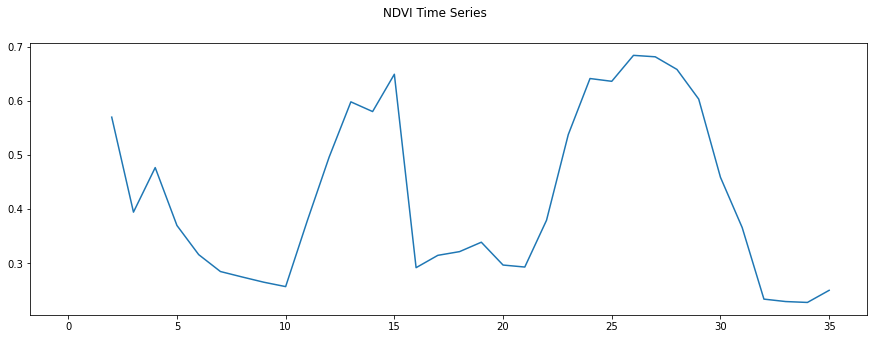

In [33]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))
plt.suptitle('NDVI Time Series')
plt.plot(meanband_ndvi)

In [34]:
print(meanband_ndvi)

[0.438229044117647, masked, 0.5702573529411765, 0.3947555147058823, 0.4770341911764706, 0.37009301470588235, 0.3162591911764706, 0.28500698529411767, 0.27493676470588235, 0.2652268382352941, 0.2571488970588235, 0.3793136029411765, 0.49635404411764705, 0.5984959558823529, 0.5805783088235293, 0.6494919117647059, 0.29212794117647056, 0.31492573529411766, 0.3217860294117647, 0.3391647058823529, 0.29699338235294115, 0.29330220588235295, 0.37974632352941173, 0.5379963235294118, 0.6416047794117646, 0.6364661764705882, 0.6844139705882353, 0.6817474264705882, 0.6583863970588235, 0.6035768382352942, 0.4591654411764706, 0.36620551470588236, 0.2340389705882353, 0.22955073529411765, 0.2278904411764706, 0.2502974264705882]


# Spectral Profile

In [35]:
items = collection.get_items(filter={'bbox':'-45.86,-12.11,-45.75,-12.19776',
                                     'time':'2018-01-01/2018-01-03', 'limit':1000})

In [36]:
items

{'features': [{'assets': {'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_blue.tif'},
    'bnir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_bnir.tif'},
    'cnc': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_MED/089097/2018-01-01_2018-01-31/S2_10_1M_MED_089097_2018-01-01_2018-01-31_cnc.tif'},
    'coastal': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_coastal.tif'},
    'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_evi.tif'},
    'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_

## Get all bands 

In [37]:
#create empty list 
lst_url = []

bands = ['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
number_of_bands = len(bands)

for item in items.features:
    for band in bands:
        lst_url.append(item.assets[band]['href'])
print(lst_url)

['http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_coastal.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_blue.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_green.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_red.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge1.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge2.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_

## Crop all bands using previous shp

In [38]:
band_path_list = es.crop_all(lst_url, output_crops, my_shp_reproj, overwrite=True)

In [39]:
band_path_list

['/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_coastal_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_blue_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_green_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_red_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge1_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge2_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge3_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_bnir_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_nir_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_swir1_crop.tif',
 '/home/fronza/Downloads/outputs/S2_10_1M_STK_089097_2018-01-01_2018-01-31_swir2_

## Build brick

In [40]:
brick, _ = es.stack(band_path_list, nodata=fill_val)

In [41]:
# initialize empty list
average_band_value = []

for band_img in brick:
    average = numpy.nanmean(band_img)
    average = average/10000 #rescale data
    average_band_value.append(average)
    print(bands)
    print(average_band_value)

['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824, 0.09455294117647059]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824, 0.09455294117647059, 0.13920992647058825]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824, 0.09455294117647059, 0.13920992647058825, 0.22206397058823532]
['coastal', 'blue', 'green', 'red', '

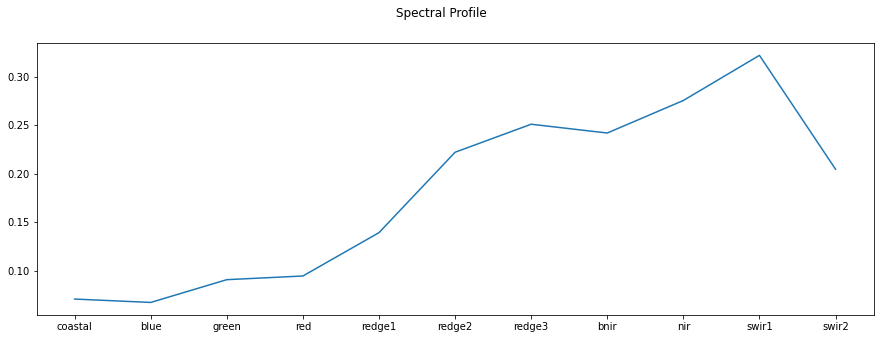

In [42]:
plt.figure(figsize=(15,5))
plt.suptitle('Spectral Profile')
plt.plot(bands, average_band_value)